MASK VS NO MASK CLASSIFICATION

In [ ]:
#import the dependencies
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
#importing os for navigating through directories
import os

preprocessing

In [ ]:
#folder path for unmasked images
path_unmasked = '/content/drive/MyDrive/datasets/face/'

In [ ]:
print(os.listdir(path_unmasked))

['guanyue', 'gulinazha', 'guobiting', 'guofucheng', 'guojingfei', 'guojingjing', 'guojingming', 'guojunchen', 'guoxiaofeng', 'gutianle', 'fanbingbing', 'fanganna', 'fangzuming', 'fanshiqi', 'fanwei', 'fanyichen', 'fengjianyu', 'fuxinbo', 'ganwei', 'gaohu', 'gaoyixiang', 'gaoyuanyuan', 'gongbeibi', 'guanxiaotong']


In [ ]:
# using listdir function we can print the names of directories in the root directory
dirs = os.listdir(path_unmasked)
print(dirs)

['guanyue', 'gulinazha', 'guobiting', 'guofucheng', 'guojingfei', 'guojingjing', 'guojingming', 'guojunchen', 'guoxiaofeng', 'gutianle', 'fanbingbing', 'fanganna', 'fangzuming', 'fanshiqi', 'fanwei', 'fanyichen', 'fengjianyu', 'fuxinbo', 'ganwei', 'gaohu', 'gaoyixiang', 'gaoyuanyuan', 'gongbeibi', 'guanxiaotong']


In [ ]:
#create a list for storing the pixel data
pixel = []

In [ ]:
# determine the size of the pixels
required_size = (64,64)

In [ ]:
#convert images to pixel data of shape(64*64*3) and reshape it to 12288
for i in dirs:
  for j in os.listdir(path_unmasked + i + '/'):
    pth = (path_unmasked + i + '/' + j)
    image = Image.open(pth)
    image = image.convert('RGB')
    image = image.resize(required_size)
    pixels = np.asarray(image)
    pixels = pixels.reshape(12288)
    pixel.append(pixels)

In [ ]:
type(pixel[0][0])

numpy.uint8

In [ ]:
arr = np.array(pixel)

In [ ]:
arr.shape

(5019, 12288)

In [ ]:
arr[0]

array([42, 33, 27, ..., 18, 17, 13], dtype=uint8)

In [ ]:
unmask = pd.DataFrame(arr)

In [ ]:
unmask.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,12248,12249,12250,12251,12252,12253,12254,12255,12256,12257,12258,12259,12260,12261,12262,12263,12264,12265,12266,12267,12268,12269,12270,12271,12272,12273,12274,12275,12276,12277,12278,12279,12280,12281,12282,12283,12284,12285,12286,12287
0,42,33,27,43,35,29,44,34,26,45,31,23,48,32,22,53,35,23,63,44,32,72,55,39,81,63,46,91,72,53,102,80,59,113,89,67,124,98,76,131,...,14,11,9,14,12,10,12,15,13,12,17,16,12,17,16,12,15,14,11,17,16,14,20,19,17,21,20,18,18,17,15,15,14,12,17,16,15,18,17,13
1,28,42,43,35,49,50,42,56,57,43,56,57,33,45,45,19,30,31,10,20,20,8,17,14,11,17,15,16,19,18,18,20,18,22,22,21,22,22,19,25,...,144,181,161,142,166,149,132,152,138,125,137,126,116,106,98,90,68,65,59,42,40,37,44,41,39,47,43,41,48,44,44,44,40,41,44,39,42,42,37,40
2,10,10,12,6,5,6,8,5,6,9,5,6,9,4,5,8,4,5,8,5,6,9,6,7,12,9,10,13,11,11,15,14,13,17,18,15,19,21,18,16,...,53,95,69,55,97,70,53,96,67,49,107,77,58,117,84,65,127,92,72,133,100,80,137,106,84,140,112,90,148,118,97,151,122,101,153,126,105,154,126,106
3,85,83,85,84,83,87,77,76,83,65,65,77,62,63,78,66,67,86,69,70,91,64,65,86,59,60,80,55,57,76,56,60,76,57,63,78,55,63,77,53,...,127,170,142,124,160,138,120,151,133,119,111,99,89,52,49,44,28,29,31,23,29,35,20,26,33,23,28,33,23,27,33,22,24,32,24,23,32,28,27,35
4,76,85,92,36,44,55,19,28,43,11,19,38,5,11,30,6,11,31,11,14,33,6,7,26,2,3,21,3,4,22,4,5,25,6,7,25,11,12,26,15,...,31,28,17,33,19,13,28,19,15,31,19,16,30,14,13,27,12,11,25,13,12,26,28,26,40,89,90,104,99,103,117,101,107,123,154,162,177,203,212,228


In [ ]:
unmask.shape

(5019, 12288)

In [ ]:
unmask[0]

0        42
1        28
2        10
3        85
4        76
       ... 
5014    226
5015     29
5016    199
5017    127
5018     58
Name: 0, Length: 5019, dtype: uint8

In [ ]:
# add the target variable to the dataframe '0' for unmasked
unmask.insert(loc=0,column='target',value=np.zeros(unmask.shape[0]))
unmask['target'] = unmask['target'].astype(int)

In [ ]:
unmask.head()

,target,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,12248,12249,12250,12251,12252,12253,12254,12255,12256,12257,12258,12259,12260,12261,12262,12263,12264,12265,12266,12267,12268,12269,12270,12271,12272,12273,12274,12275,12276,12277,12278,12279,12280,12281,12282,12283,12284,12285,12286,12287
0,0,42,33,27,43,35,29,44,34,26,45,31,23,48,32,22,53,35,23,63,44,32,72,55,39,81,63,46,91,72,53,102,80,59,113,89,67,124,98,76,...,14,11,9,14,12,10,12,15,13,12,17,16,12,17,16,12,15,14,11,17,16,14,20,19,17,21,20,18,18,17,15,15,14,12,17,16,15,18,17,13
1,0,28,42,43,35,49,50,42,56,57,43,56,57,33,45,45,19,30,31,10,20,20,8,17,14,11,17,15,16,19,18,18,20,18,22,22,21,22,22,19,...,144,181,161,142,166,149,132,152,138,125,137,126,116,106,98,90,68,65,59,42,40,37,44,41,39,47,43,41,48,44,44,44,40,41,44,39,42,42,37,40
2,0,10,10,12,6,5,6,8,5,6,9,5,6,9,4,5,8,4,5,8,5,6,9,6,7,12,9,10,13,11,11,15,14,13,17,18,15,19,21,18,...,53,95,69,55,97,70,53,96,67,49,107,77,58,117,84,65,127,92,72,133,100,80,137,106,84,140,112,90,148,118,97,151,122,101,153,126,105,154,126,106
3,0,85,83,85,84,83,87,77,76,83,65,65,77,62,63,78,66,67,86,69,70,91,64,65,86,59,60,80,55,57,76,56,60,76,57,63,78,55,63,77,...,127,170,142,124,160,138,120,151,133,119,111,99,89,52,49,44,28,29,31,23,29,35,20,26,33,23,28,33,23,27,33,22,24,32,24,23,32,28,27,35
4,0,76,85,92,36,44,55,19,28,43,11,19,38,5,11,30,6,11,31,11,14,33,6,7,26,2,3,21,3,4,22,4,5,25,6,7,25,11,12,26,...,31,28,17,33,19,13,28,19,15,31,19,16,30,14,13,27,12,11,25,13,12,26,28,26,40,89,90,104,99,103,117,101,107,123,154,162,177,203,212,228


In [ ]:
#folder path for masked dataset
path_masked = '/content/drive/MyDrive/datasets/Masked/'

In [ ]:
#storing all the sub directories of masked data
sub_dir = os.listdir(path_masked)

In [ ]:
masks = []

In [ ]:
#converting images into pixel data
for i in sub_dir:
  for j in os.listdir(path_masked + i + '/'):
    pth = (path_masked + i + '/' + j)
    image = Image.open(pth)
    image = image.convert('RGB')
    image = image.resize(required_size)
    pixels = np.asarray(image)
    pixels = pixels.reshape(12288)
    masks.append(pixels)

In [ ]:
arr2 = np.array(masks)

In [ ]:
arr2.shape

(467, 12288)

In [ ]:
mask = pd.DataFrame(arr2)
mask.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,12248,12249,12250,12251,12252,12253,12254,12255,12256,12257,12258,12259,12260,12261,12262,12263,12264,12265,12266,12267,12268,12269,12270,12271,12272,12273,12274,12275,12276,12277,12278,12279,12280,12281,12282,12283,12284,12285,12286,12287
0,187,150,128,177,134,103,168,117,78,152,98,61,126,75,47,105,65,46,89,59,45,78,52,41,62,42,36,46,43,35,35,42,39,24,31,31,20,25,23,28,...,32,46,39,31,55,43,35,78,63,53,71,58,46,85,70,59,106,88,74,87,63,49,94,63,48,115,78,58,128,88,58,119,77,48,149,104,83,147,103,83
1,195,163,128,212,178,142,223,189,151,228,194,156,228,194,156,227,192,155,225,188,152,220,184,147,213,178,141,208,169,134,186,139,114,152,97,86,130,77,75,114,...,52,33,22,54,32,21,53,32,21,53,32,21,53,32,21,53,32,21,53,32,21,53,33,20,52,34,20,53,35,21,54,35,22,52,41,27,56,45,29,58
2,59,37,39,58,36,36,73,49,49,85,59,59,85,57,56,83,53,52,75,46,45,66,40,41,72,51,50,70,50,49,64,43,42,74,53,52,76,53,53,70,...,100,154,104,100,158,106,101,169,116,105,175,125,110,179,133,119,183,144,130,182,151,137,183,161,147,188,171,160,191,177,170,188,183,177,214,221,213,211,227,217
3,58,45,36,51,38,33,44,33,29,47,37,33,56,47,42,52,42,38,49,37,36,42,31,29,40,29,28,38,29,29,36,28,29,37,28,30,36,28,30,34,...,96,120,85,78,99,66,60,78,49,45,54,31,32,90,77,86,154,150,172,203,203,228,81,71,79,207,173,181,208,152,159,106,79,77,113,112,110,201,106,107
4,30,26,26,31,26,26,32,26,25,37,31,30,40,34,32,38,31,30,35,29,28,33,28,27,32,27,28,26,24,27,23,24,26,24,24,28,25,24,29,27,...,255,221,229,255,218,225,255,214,221,255,212,221,255,219,229,255,225,235,255,224,235,255,222,235,255,222,235,255,222,236,255,224,236,255,226,237,255,225,236,255


In [ ]:
mask.shape

(467, 12288)

In [ ]:
#adding target column. '1' for masked samples
mask.insert(loc=0,column='target',value=np.ones(mask.shape[0]))

In [ ]:
mask['target']=mask['target'].astype(int)

In [ ]:
mask.head()

,target,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,12248,12249,12250,12251,12252,12253,12254,12255,12256,12257,12258,12259,12260,12261,12262,12263,12264,12265,12266,12267,12268,12269,12270,12271,12272,12273,12274,12275,12276,12277,12278,12279,12280,12281,12282,12283,12284,12285,12286,12287
0,1,187,150,128,177,134,103,168,117,78,152,98,61,126,75,47,105,65,46,89,59,45,78,52,41,62,42,36,46,43,35,35,42,39,24,31,31,20,25,23,...,32,46,39,31,55,43,35,78,63,53,71,58,46,85,70,59,106,88,74,87,63,49,94,63,48,115,78,58,128,88,58,119,77,48,149,104,83,147,103,83
1,1,195,163,128,212,178,142,223,189,151,228,194,156,228,194,156,227,192,155,225,188,152,220,184,147,213,178,141,208,169,134,186,139,114,152,97,86,130,77,75,...,52,33,22,54,32,21,53,32,21,53,32,21,53,32,21,53,32,21,53,32,21,53,33,20,52,34,20,53,35,21,54,35,22,52,41,27,56,45,29,58
2,1,59,37,39,58,36,36,73,49,49,85,59,59,85,57,56,83,53,52,75,46,45,66,40,41,72,51,50,70,50,49,64,43,42,74,53,52,76,53,53,...,100,154,104,100,158,106,101,169,116,105,175,125,110,179,133,119,183,144,130,182,151,137,183,161,147,188,171,160,191,177,170,188,183,177,214,221,213,211,227,217
3,1,58,45,36,51,38,33,44,33,29,47,37,33,56,47,42,52,42,38,49,37,36,42,31,29,40,29,28,38,29,29,36,28,29,37,28,30,36,28,30,...,96,120,85,78,99,66,60,78,49,45,54,31,32,90,77,86,154,150,172,203,203,228,81,71,79,207,173,181,208,152,159,106,79,77,113,112,110,201,106,107
4,1,30,26,26,31,26,26,32,26,25,37,31,30,40,34,32,38,31,30,35,29,28,33,28,27,32,27,28,26,24,27,23,24,26,24,24,28,25,24,29,...,255,221,229,255,218,225,255,214,221,255,212,221,255,219,229,255,225,235,255,224,235,255,222,235,255,222,235,255,222,236,255,224,236,255,226,237,255,225,236,255


In [ ]:
#concatenating unmasked and masked data
df = pd.concat([unmask,mask])

In [ ]:
#shuffling data to avoid bias
df = df.sample(frac=1).reset_index(drop=True)

In [ ]:
# standard scaling the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df.iloc[:,1:] = scaler.fit_transform(df.iloc[:,1:])

In [ ]:
#separate the target variable
x = df.iloc[:,1:]
y = df.iloc[:,0]

with dimensionality reduction

In [ ]:
#apply PCA
from sklearn.decomposition import PCA
pc = PCA().fit(x,y)

Text(0, 0.5, 'cumulative explained variance')

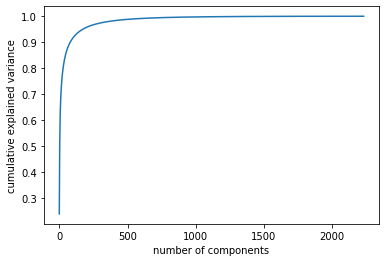

In [ ]:
#plotting data variance vs n_components
plt.plot(np.cumsum(pc.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [ ]:
#fitting and transforming the data with 500 components
pc = PCA(n_components=500)
pca = pc.fit(x,y).transform(x)

In [ ]:
np.sum(pc.explained_variance_ratio_)

0.987876346820614

In [ ]:
x = pd.DataFrame(pca)
x.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499
0,-84.078966,8.129117,-30.890874,-18.345172,-28.030394,7.121796,25.799737,5.963874,9.331851,15.995789,4.831944,7.390277,14.373351,-7.164171,3.945956,6.846211,-4.908315,1.120354,-2.301526,4.874449,7.392526,-5.305743,-1.977082,3.968024,15.239750,8.007184,0.954064,-4.080778,3.874598,-1.649931,-12.519792,6.314233,3.712009,-3.531685,-9.956587,-6.308463,1.413435,1.875734,5.399851,-6.983632,...,-0.263123,-0.357393,-0.827144,0.187830,0.474954,1.083036,-0.052126,-1.002998,0.878120,0.725286,0.377219,-0.251438,0.274697,1.182372,-1.390948,1.005063,-0.441766,-0.871616,0.832302,0.143053,-2.269504,-0.586409,1.316527,-0.336183,1.231757,0.304250,0.089893,-0.126961,-0.719620,-0.971520,0.903899,-0.311677,-0.527779,-0.949031,0.673448,0.020030,-0.354526,0.708779,-0.377558,-0.060941
1,-50.404018,44.538868,-21.586592,-33.478051,3.216078,25.028781,13.716035,2.523839,4.951964,-13.071841,-17.065729,6.798309,-20.764223,-15.941030,15.870146,14.295506,9.457423,4.814106,12.398475,10.933055,-8.137047,-1.176197,-0.235682,-0.071100,5.755251,6.217748,4.627647,5.796319,1.744781,11.752994,10.471963,-15.886146,-3.475217,10.777821,-0.769828,6.592055,5.568300,3.640188,9.250274,4.099653,...,0.231003,0.269498,0.527466,-1.362715,0.025159,0.566526,-0.180929,-0.117883,-0.689534,-1.355261,-0.378740,-0.124000,0.794205,-0.213402,1.484369,0.274850,0.157806,-0.843581,0.343080,0.510525,-0.769061,-1.143702,0.415635,0.741480,-1.961477,0.678656,-0.202731,0.099016,-1.266593,0.468823,-0.112468,0.125269,0.295411,0.439678,-0.614063,-0.751730,0.274777,-0.139576,0.002349,0.523909
2,-76.152598,60.469126,37.397452,-3.602005,55.498053,-4.872573,-27.483397,1.748199,-9.713898,1.024454,0.199360,-6.209407,5.117265,7.602941,7.035994,-0.004272,1.028012,4.770712,-2.564730,-14.563051,-13.741018,1.223264,-0.874668,-4.225064,6.066923,-2.141541,-12.475380,-6.535188,-3.117977,7.279253,2.668228,-5.623348,-1.349688,-1.188502,-2.621404,4.067820,10.947619,-5.134913,1.699032,8.723272,...,0.431580,0.484143,-0.169254,-1.078315,-1.235782,-0.270522,-0.718318,-0.489952,0.212444,0.274879,-1.516746,0.113771,0.316826,-0.236731,-0.087903,-0.143305,0.445484,-1.126577,0.170087,0.033497,-0.159081,0.773248,-0.013723,-1.436696,0.461096,0.548213,-0.455286,-0.306465,-0.354726,-0.542484,-1.512199,-0.662326,0.508528,-0.338589,0.012593,-1.144874,-0.531034,1.164704,-0.158685,0.211795
3,-55.377776,38.779756,-7.090174,-0.512134,0.955761,3.669050,35.368133,14.477017,-11.049409,7.584464,-12.432293,-20.359062,18.495580,24.553993,-9.573143,5.411485,0.566656,6.686348,24.056664,-0.856587,3.236479,12.909313,8.812206,3.979332,-3.655959,-2.785921,18.175208,-9.335818,0.284569,-5.017275,-7.173653,3.972611,7.447414,-3.843492,-0.512019,1.889239,5.258428,-6.499795,0.863430,5.357344,...,0.550523,1.170442,-1.430269,0.032696,0.252034,0.111988,0.050515,-0.112459,-0.694750,0.306955,1.165294,-0.332907,-0.388071,-1.353197,-0.533036,0.232550,-0.047841,0.013195,-0.140165,0.355443,-0.993977,0.666575,-0.361255,-0.330352,-0.364399,-0.014326,0.294279,-0.793868,-0.675504,-0.788733,-0.555819,-0.498347,-0.221322,-0.417391,0.183082,-0.222050,0.417979,-0.280168,0.190965,-0.950612
4,10.910697,4.813887,-18.281730,-39.105773,-8.501209,23.108450,3.909865,-12.643397,-4.411848,6.617658,6.462435,7.748942,6.935590,1.837665,-2.948940,-12.741352,-10.621316,-7.801274,4.847909,3.824723,-1.886026,11.223497,1.632956,1.709135,-3.367105,-0.085177,-0.044254,-2.620700,3.919418,-2.335721,1.885717,1.738695,2.875047,-6.492720,5.196970,-4.673491,-4.391221,6.620769,-8.235113,-4.212743,...,0.827968,-0.063552,0.182984,0.088063,0.497967,0.651896,0.299106,0.734729,0.439189,-0.104701,-0.466259,1.295976,0.582485,0.267299,-0.143422,-0.038226,0.579870,0.400565,0.787772,0.184527,-0.530121,-0.176810,0.494961,-0.346437,-

In [ ]:
#splitting data into train and test in the ratio 1:1
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.5)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
#model the random forest classifier
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=1)

In [ ]:
#perform gridsearchcv for bes parameters
from sklearn.model_selection import GridSearchCV
params = { 
    'max_features': ['sqrt', 'log2'],
    'max_depth' : [6,8,10],
    'min_samples_leaf': [8,10,13],
}
gs = GridSearchCV(estimator=rf_model, param_grid=params, cv= 5)
gs.fit(x_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=10,
                                              max_features='sqrt',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=8,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=1,
                                     

In [ ]:
#get the best parameters
gs.best_params_

{'max_depth': 6, 'max_features': 'sqrt', 'min_samples_leaf': 8}

In [ ]:
gs.best_score_

0.9005405188981422

In [ ]:
# model the randomforest with the best params obtained from grid search
rf_model = RandomForestClassifier(random_state=1,max_depth=6,max_features='sqrt',min_samples_leaf=8)
rf_model.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=6, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [ ]:
rf = rf_model.predict(x_test)
accuracy_score(rf,y_test)

0.8915770609318996

In [ ]:
#model the gaussianNB classifier
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

In [ ]:
#perform gridsearch
from sklearn.model_selection import GridSearchCV
params_GNB = {'var_smoothing': np.logspace(0,-9, num=100)}
gs = GridSearchCV(estimator=gnb, param_grid=params_GNB, cv=5,verbose=1,scoring='accuracy')
gs.fit(x_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    5.8s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=GaussianNB(priors=None, var_smoothing=1e-09),
             iid='deprecated', n_jobs=None,
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.5...
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=1)

In [ ]:
# get the best params
gs.best_params_

{'var_smoothing': 0.08111308307896872}

In [ ]:
gs.best_score_

0.9193625880845613

In [ ]:
#train with best params
gnb = GaussianNB(var_smoothing= 0.08111308307896872)
gnb.fit(x_train,y_train)

GaussianNB(priors=None, var_smoothing=0.08111308307896872)

In [ ]:
#compute the accuracy
gnb_pred = gnb.predict(x_test)
accuracy_score(y_test,gnb_pred)

0.9059139784946236

In [ ]:
#model the KNN classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [ ]:
#perform gridsearch
params_KNN = {'n_neighbors': [7,8,9], 'p': [1, 2, 5]}
gs_KNN = GridSearchCV(estimator=knn, param_grid=params_KNN,cv=5,verbose=1,scoring='accuracy')
gs_KNN.fit(x_train,y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:   56.5s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [7, 8, 9], 'p': [1, 2, 5]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=1)

In [ ]:
#get the best params
gs_KNN.best_params_

{'n_neighbors': 7, 'p': 5}

In [ ]:
gs_KNN.best_score_

0.9399783792440743

In [ ]:
#train the model with the best params
knn = KNeighborsClassifier(n_neighbors=7,p=5)
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=5,
                     weights='uniform')

In [ ]:
#predict the output and calculate the accuracy
kn = knn.predict(x_test)
accuracy_score(kn,y_test)

0.9408602150537635

In [ ]:
#model evaluation using cross validation
from sklearn.model_selection import cross_val_score
cvl_rf = cross_val_score(rf_model, x_train, y_train, cv=5)
cvl_gnb = cross_val_score(gnb, x_train, y_train, cv=5)
cvl_knn = cross_val_score(knn, x_train, y_train, cv=5)

In [ ]:
print(cvl_rf)
print("Randomforest model : ",np.mean(cvl_rf))
print(cvl_gnb)
print("GNB model : ",np.mean(cvl_gnb))
print(cvl_knn)
print("KNN model : ",np.mean(cvl_knn))

[0.89732143 0.90134529 0.90134529 0.90134529 0.90134529]
Randomforest model :  0.9005405188981422
[0.91071429 0.91479821 0.92376682 0.92376682 0.92376682]
GNB model :  0.9193625880845613
[0.92410714 0.92825112 0.95515695 0.94170404 0.95067265]
KNN model :  0.9399783792440743


Without dimensionality reduction

In [ ]:
df_w = pd.concat([unmask,mask])

In [ ]:
x_w = df_w.iloc[:,1:]
y_w = df_w.iloc[:,0]

In [ ]:
xw_train,xw_test,yw_train,yw_test = train_test_split(x_w,y_w,test_size=0.5)

In [ ]:
#randomforest model
rf_model_w = RandomForestClassifier(random_state=1,max_depth=6,max_features='sqrt',min_samples_leaf=8)
rf_model_w.fit(xw_train,yw_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=6, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [ ]:
#predict the output and calculate the accuracy
rf_w = rf_model_w.predict(xw_test)
accuracy_score(rf_w,yw_test)

0.971199416697047

In [ ]:
#gaussianNB model
gnb_w = GaussianNB()
gnb_w.fit(xw_train,yw_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
#predict the accuracy
gnb_pred_w = gnb_w.predict(xw_test)
accuracy_score(gnb_pred_w,yw_test)

0.8683922712358731

In [ ]:
#KNN model
from sklearn.neighbors import KNeighborsClassifier
knn_w = KNeighborsClassifier(n_neighbors= 7,p= 5)
knn_w.fit(xw_train,yw_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=5,
                     weights='uniform')

In [ ]:
#predict the accuracy
kn_w = knn_w.predict(xw_test)
accuracy_score(kn_w,yw_test)

0.8951612903225806

In [ ]:
#performing cross validation
from sklearn.model_selection import cross_val_score
cvl_rf_w = cross_val_score(rf_model_w, xw_train, yw_train, cv=5)
cvl_gnb_w = cross_val_score(gnb_w, xw_train, yw_train, cv=5)
cvl_knn_w = cross_val_score(knn_w, xw_train, yw_train, cv=5)

In [ ]:
print(cvl_rf_w)
print("Randomforest model : ",np.mean(cvl_rf_w))
print(cvl_gnb_w)
print("GNB model : ",np.mean(cvl_gnb_w))
print(cvl_knn_w)
print("KNN model : ",np.mean(cvl_knn_w))

[0.94196429 0.96860987 0.98206278 0.96412556 0.95964126]
Randomforest model :  0.9632807495195387
[0.86607143 0.86995516 0.86995516 0.91479821 0.88340807]
GNB model :  0.880837604099936
[0.90178571 0.9058296  0.9058296  0.9058296  0.9058296 ]
KNN model :  0.9050208199871876


In [ ]:
xw_test = xw_test.values
yw_test = yw_test.values

Random forest model Predited :  0
GNB model Predited :  0
KNN model Predited :  0
Actual :  0


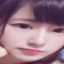

Random forest model Predited :  0
GNB model Predited :  0
KNN model Predited :  0
Actual :  0


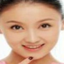

Random forest model Predited :  1
GNB model Predited :  1
KNN model Predited :  0
Actual :  1


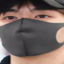

Random forest model Predited :  0
GNB model Predited :  0
KNN model Predited :  0
Actual :  0


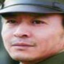

Random forest model Predited :  1
GNB model Predited :  1
KNN model Predited :  0
Actual :  1


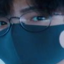

Random forest model Predited :  0
GNB model Predited :  0
KNN model Predited :  0
Actual :  0


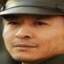

Random forest model Predited :  0
GNB model Predited :  0
KNN model Predited :  0
Actual :  0


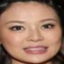

Random forest model Predited :  0
GNB model Predited :  0
KNN model Predited :  0
Actual :  0


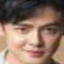

Random forest model Predited :  1
GNB model Predited :  1
KNN model Predited :  0
Actual :  1


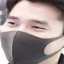

Random forest model Predited :  0
GNB model Predited :  0
KNN model Predited :  0
Actual :  0


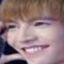

In [ ]:
from PIL import Image
from IPython.display import display
import matplotlib.pyplot as plt
testcase_y = yw_test[0:10]
predicted_rf = rf_model_w.predict(xw_test[0:10,:])
predicted_gnb = gnb_w.predict(xw_test[0:10,:])
predicted_knn = knn_w.predict(xw_test[0:10,:])
y_act_img=yw_test[0:10]
for i in range(10):
  t=xw_test[i,:]
  rgb=np.array(t).reshape(64,64,3)
  rgb=rgb.astype(np.uint8)
  print("Random forest model Predited : ",predicted_rf[i])
  print("GNB model Predited : ",predicted_gnb[i])
  print("KNN model Predited : ",predicted_knn[i])
  print("Actual : ",testcase_y[i])
  image=Image.fromarray(np.array(rgb),'RGB')
  display(image)